In [31]:
import polars as pl
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

import sys
work_path = Path(next((p for p in Path("__file__").resolve().parents if p.name == "Research"), None))
torchlib_path = str(work_path / Path("app/torch_libs"))
sys.path.append(torchlib_path)

from run_manager import RunManager, RunsManager, RunViewer


In [32]:
nb_path = Path().resolve()
# rm = RunManager(exp_path=nb_path)
# rm.ref_stats()
rv = RunViewer(exp_path=nb_path)
df_base = rv.fetch_results()

pass


In [33]:
df_res = df_base

cols = ["train_dataset", "train_num", "classdist"]

df_uq = df_res.unique(cols, maintain_order=True).select(cols)

df_res_mf = None

for cond in df_uq.iter_rows(named=True):
    df_cond = df_res
    for k, v in cond.items():
        df_cond = df_cond.filter(pl.col(k) == v)
    
    max_fil = df_cond["fils"].max()
    # min_fil = df_cond["fils"].min()
    max_fil_vacc = df_cond.filter(pl.col("fils") == max_fil)["val_acc"].mean()
    
    df_cond = df_cond.with_columns(pl.lit(max_fil_vacc).alias("val_acc_mf"))
    
    if df_res_mf is None:
        df_res_mf = df_cond
    else:
        df_res_mf = pl.concat([df_res_mf, df_cond], how="vertical")
        

# with pl.Config() as cfg:
    # cfg.set_tbl_rows(-1)
    # cfg.set_tbl_cols(-1)
display(df_res_mf)

df_res_mf = df_res_mf.with_columns((pl.col("val_acc") - pl.col("val_acc_mf")).alias("mf_diff"))
# df_res_mf = df_res_mf.with_columns((pl.col("val_acc") / pl.col("val_acc_mf")).alias("mf_diff") - 1)
    





run_id,model_arc,train_dataset,val_dataset,num_classes,train_trans,val_trans,train_num,val_num,epochs,max_lr,batch_size,iters/epoch,base_fils,fils,ensembles,classdist,classdist2,classdist3,params,loss_func,optimizer,scheduler,lr,epoch,train_loss,train_acc,val_loss,val_acc,val_acc_mf
i64,str,str,str,i64,str,str,i64,i64,i64,f64,i64,i64,i64,i64,i64,f64,f64,f64,i64,str,str,str,f64,i64,f64,f64,f64,f64,f64
102,"""models.gitresnet_ee resnet18""","""cifar100_train""","""cifar100_val""",10,"""[ToTensor(), RandomHorizontalF…","""[ToTensor()]""",5000,1000,200,0.0005,128,40,32,1,1024,1.617023,1.1595737,0.6382765,3062784,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 20…",3.0842e-8,200,0.15679,0.6932,0.190502,0.578,0.5635
103,"""models.gitresnet_ee resnet18""","""cifar100_train""","""cifar100_val""",10,"""[ToTensor(), RandomHorizontalF…","""[ToTensor()]""",5000,1000,200,0.0005,128,40,32,2,256,1.617023,1.1595737,0.6382765,2923520,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 20…",3.0842e-8,200,0.111554,0.7942,0.187129,0.61,0.5635
104,"""models.gitresnet_ee resnet18""","""cifar100_train""","""cifar100_val""",10,"""[ToTensor(), RandomHorizontalF…","""[ToTensor()]""",5000,1000,200,0.0005,128,40,32,4,64,1.617023,1.1595737,0.6382765,2855808,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 20…",3.0842e-8,200,0.089588,0.8384,0.193063,0.617,0.5635
105,"""models.gitresnet_ee resnet18""","""cifar100_train""","""cifar100_val""",10,"""[ToTensor(), RandomHorizontalF…","""[ToTensor()]""",5000,1000,200,0.0005,128,40,32,8,16,1.617023,1.1595737,0.6382765,2822432,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 20…",3.0842e-8,200,0.070318,0.8684,0.217982,0.58,0.5635
106,"""models.gitresnet_ee resnet18""","""cifar100_train""","""cifar100_val""",10,"""[ToTensor(), RandomHorizontalF…","""[ToTensor()]""",5000,1000,200,0.0005,128,40,32,16,4,1.617023,1.1595737,0.6382765,2805864,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 20…",3.0842e-8,200,0.041359,0.9312,0.2474,0.579,0.5635
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
397,"""models.gitresnet_ee resnet18""","""cifar100_train""","""cifar100_val""",10,"""[ToTensor(), RandomHorizontalF…","""[ToTensor()]""",5000,1000,200,0.0005,128,40,32,2,256,4.0821066,1.8572738,1.3595616,2923520,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 20…",3.0842e-8,200,0.052198,0.9204,0.103973,0.793,0.735
398,"""models.gitresnet_ee resnet18""","""cifar100_train""","""cifar100_val""",10,"""[ToTensor(), RandomHorizontalF…","""[ToTensor()]""",5000,1000,200,0.0005,128,40,32,4,64,4.0821066,1.8572738,1.3595616,2855808,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 20…",3.0842e-8,200,0.038696,0.9362,0.108295,0.775,0.735
399,"""models.gitresnet_ee resnet18""","""cifar100_train""","""cifar100_val""",10,"""[ToTensor(), RandomHorizontalF…","""[ToTensor()]""",5000,1000,200,0.0005,128,40,32,8,16,4.0821066,1.8572738,1.3595616,2822432,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 20…",3.0842e-8,200,0.03253,0.949,0.125535,0.772,0.735


array([[ 1.        , -0.00900722],
       [-0.00900722,  1.        ]])

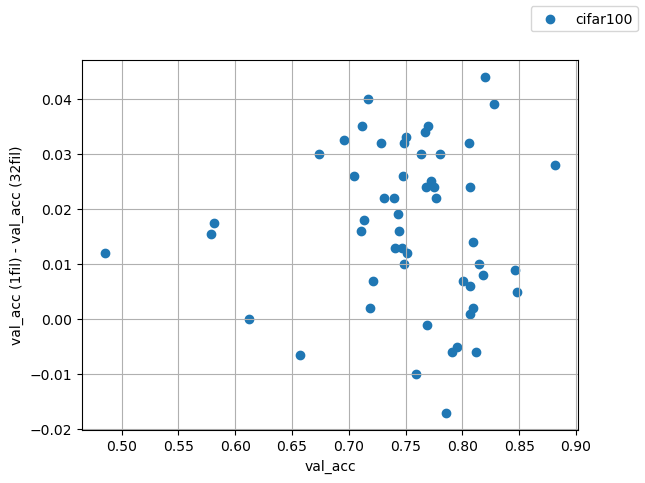

In [34]:
df_res_mf = df_res_mf.filter(pl.col("fils") == 16)

df_res_f1_b = df_res_mf

# df_res_mf = df_res_mf.filter(pl.col("train_num") == 1000)
df_res_mf = df_res_mf.sort("val_acc", descending=True)

df_res_f1 = df_res_f1_b.sort("val_acc", descending=True)

fig, ax = plt.subplots()

# ext_col = "train_num"
ext_col = "train_dataset"
x_col = "val_acc"
# x_col = "classdist"
y_col = "mf_diff"
# y_col = "classdist2"

for ds in df_res_f1[ext_col].unique(maintain_order=True):
    df_res_ft = df_res_f1.filter(pl.col(ext_col) == ds)
    x = df_res_ft[x_col]
    y = df_res_ft[y_col]

    ax.scatter(x, y, label=ds[:-6])

ax.set_xlabel(x_col)
ax.set_ylabel("val_acc (1fil) - val_acc (32fil)")
ax.grid()
fig.legend()
fig.show()

np.corrcoef(x, y)

